In [ ]:
from OutText_preprocessing.outlier_removal import OutlierRemover


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anurag\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


TypeError: OutlierRemover.get_available_methods() missing 1 required positional argument: 'self'

In [6]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from OutText_preprocessing.outlier_removal import OutlierRemover

# Step 1: Generate a synthetic dataset with outliers
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)
X[::50] = X[::50] + np.random.uniform(10, 100, size=X[::50].shape)  # Add outliers at every 50th row

# Step 2: Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to train Random Forest and calculate accuracy
def train_and_evaluate(X_train, X_test, y_train, y_test, method):
    remover = OutlierRemover(method=method, threshold=2.5)  # You can tune the threshold
    try:
        processed_train = remover.fit_transform(pd.DataFrame(X_train.copy()))
        processed_test = remover.fit_transform(pd.DataFrame(X_test.copy()))
    except Exception as e:
        print(f"Error with method {method}: {e}")
        return None

    # Train Random Forest classifier
    rf = RandomForestClassifier(random_state=42)
    rf.fit(processed_train, y_train)

    # Predict on test set
    y_pred = rf.predict(processed_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Step 3: Evaluate with all methods
methods = [
    "zscore",
    "zscore_capper",
    "yeo_johnson",
    "yeo_johnson_capper",
    "impact_reduction",
    "adaptive_trimming",
    "smooth_capping",
    "local_standardization"
]

# Step 4: Compare accuracy for each method
results = {}
for method in methods:
    accuracy = train_and_evaluate(X_train, X_test, y_train, y_test, method)
    if accuracy is not None:
        results[method] = accuracy

# Display results
for method, accuracy in results.items():
    print(f"Method: {method}, Accuracy: {accuracy:.4f}")


ValueError: Found input variables with inconsistent numbers of samples: [686, 700]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from OutText_preprocessing.outlier_removal import OutlierRemover

# Step 1: Generate a synthetic dataset with outliers
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)
X[::50] = X[::50] + np.random.uniform(10, 100, size=X[::50].shape)  # Add outliers at every 50th row

# Step 2: Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to train Random Forest and calculate accuracy
def train_and_evaluate(X_train, X_test, y_train, y_test, method):
    remover = OutlierRemover(method=method, threshold=2.5)  # You can tune the threshold
    try:
        processed_train = remover.fit_transform(pd.DataFrame(X_train.copy()))
        processed_test = remover.fit_transform(pd.DataFrame(X_test.copy()))
    except Exception as e:
        print(f"Error with method {method}: {e}")
        return None

    # Ensure that the number of rows in X_train and y_train are the same
    processed_train = processed_train.iloc[:len(y_train), :]
    processed_test = processed_test.iloc[:len(y_test), :]

    # Train Random Forest classifier
    rf = RandomForestClassifier(random_state=42)
    rf.fit(processed_train, y_train)

    # Predict on test set
    y_pred = rf.predict(processed_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Step 3: Evaluate with all methods
methods = [

    "zscore_capper",
    "yeo_johnson_capper",
    "impact_reduction",
    "adaptive_trimming",
    "smooth_capping",
    "local_standardization"
]

# Step 4: Compare accuracy for each method
results = {}
for method in methods:
    print(method)
    accuracy = train_and_evaluate(X_train, X_test, y_train, y_test, method)
    if accuracy is not None:
        results[method] = accuracy

# Display results
for method, accuracy in results.items():
    print(f"Method: {method}, Accuracy: {accuracy:.4f}")


zscore_capper
yeo_johnson_capper
impact_reduction
adaptive_trimming
smooth_capping
local_standardization
Method: zscore_capper, Accuracy: 0.8900
Method: yeo_johnson_capper, Accuracy: 0.8800
Method: impact_reduction, Accuracy: 0.8900
Method: adaptive_trimming, Accuracy: 0.8833
Method: smooth_capping, Accuracy: 0.8900
Method: local_standardization, Accuracy: 0.8900


In [14]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from OutText_preprocessing.outlier_removal import OutlierRemover

# Step 1: Create synthetic data
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])

# Add some synthetic outliers
df.iloc[::50] += 100

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

# Step 3: Define methods to apply on selected columns
methods_columns_dict = {
    "zscore_capper": ["feature_0", "feature_1"],
    "local_standardization": ["feature_2"],
    "impact_reduction": ["feature_3"],
    "adaptive_trimming": ["feature_4"]
}

# Step 4: Apply multi_outlier_multi_columns
remover = OutlierRemover(threshold=2.5)  # smooth_factor if needed
X_train_processed = remover.multi_outlier_multi_columns(X_train, methods_columns_dict)
X_test_processed = remover.multi_outlier_multi_columns(X_test, methods_columns_dict)

# Step 5: Train and evaluate
model = RandomForestClassifier(random_state=42)
model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after multi-column outlier handling: {accuracy:.4f}")


Accuracy after multi-column outlier handling: 0.8900


In [16]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
df.to_csv("xle.csv")

# Step 2: Add synthetic outliers to simulate real-world noise
df.iloc[::50] += 100

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

# Step 4: Apply RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train RandomForest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

# Step 6: Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after applying RobustScaler (outlier impact reducer): {accuracy:.4f}")


Accuracy after applying RobustScaler (outlier impact reducer): 0.9033


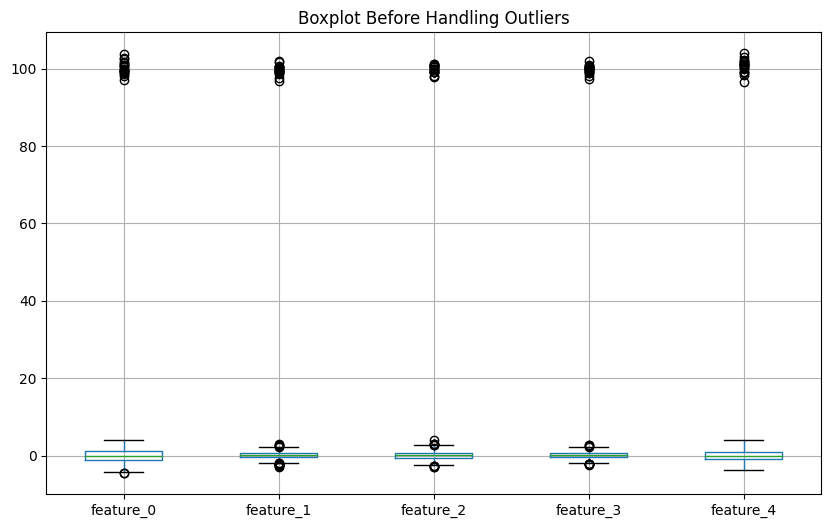

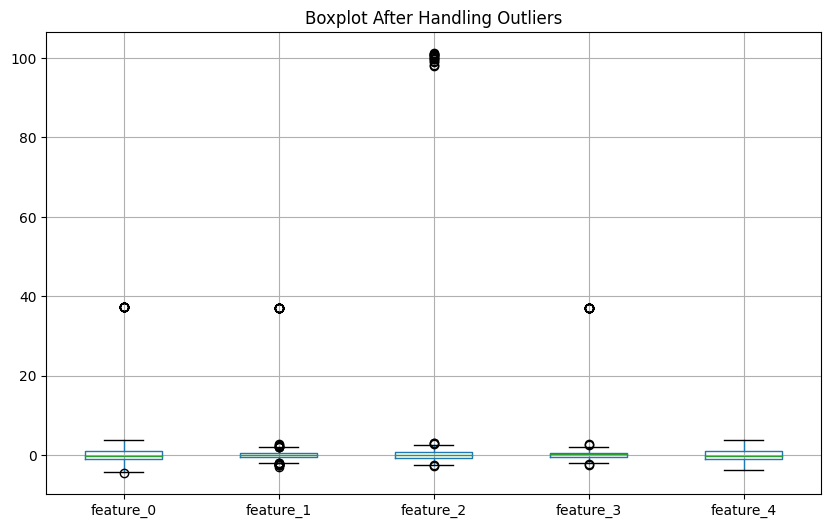

Accuracy after multi-column outlier handling: 0.8900
Evaluating method: RobustScaler
Evaluating method: zscore_capper
Evaluating method: yeo_johnson_capper
Evaluating method: impact_reduction
Evaluating method: adaptive_trimming
Evaluating method: smooth_capping
Evaluating method: local_standardization

Comparison of Accuracy:
Method: RobustScaler, Accuracy: 0.9033
Method: zscore_capper, Accuracy: 0.9033
Method: yeo_johnson_capper, Accuracy: 0.9033
Method: impact_reduction, Accuracy: 0.9033
Method: adaptive_trimming, Accuracy: 0.9033
Method: smooth_capping, Accuracy: 0.9033
Method: local_standardization, Accuracy: 0.9033


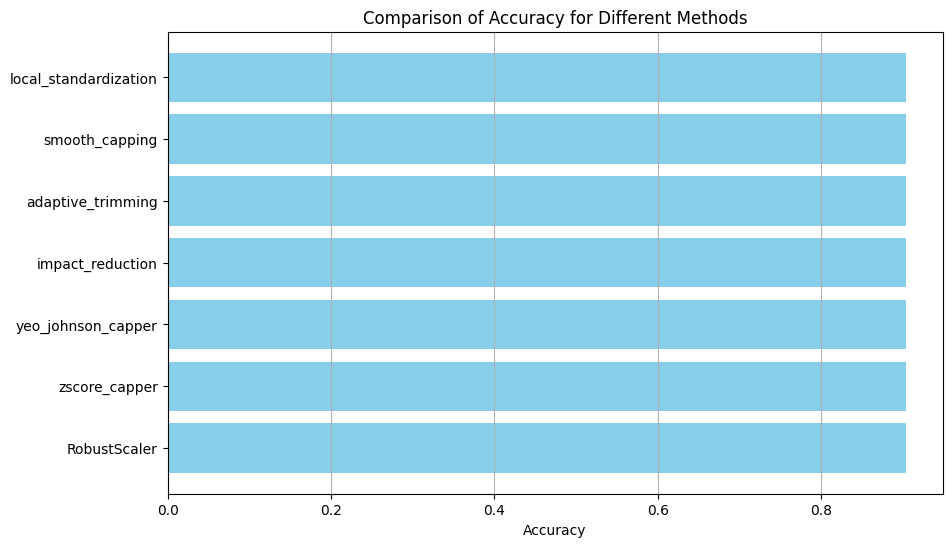

In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from OutText_preprocessing.outlier_removal import OutlierRemover
import matplotlib.pyplot as plt

# Step 1: Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
df.to_csv("xle.csv")

# Step 2: Add synthetic outliers (noise) to simulate real-world data
df.iloc[::50] += 100

# Step 3: Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

# Step 4: Define methods to apply multi-column outlier handling
methods_columns_dict = {
    "zscore_capper": ["feature_0", "feature_1"],  # Apply z-score capping to feature_0 and feature_1
    "local_standardization": ["feature_2"],  # Apply local standardization to feature_2
    "impact_reduction": ["feature_3"],  # Apply impact reduction to feature_3
    "adaptive_trimming": ["feature_4"]  # Apply adaptive trimming to feature_4
}

# Step 5: Visualize the distribution of the features before handling outliers using boxplot
plt.figure(figsize=(10, 6))
df[["feature_0", "feature_1", "feature_2", "feature_3", "feature_4"]].boxplot()
plt.title("Boxplot Before Handling Outliers")
plt.show()

# Step 6: Apply outlier handling on selected columns using the multi_outlier_multi_columns method
remover = OutlierRemover(threshold=2.5)  # Outlier threshold set to 2.5
X_train_processed = remover.multi_outlier_multi_columns(X_train, methods_columns_dict)
X_test_processed = remover.multi_outlier_multi_columns(X_test, methods_columns_dict)

# Step 7: Visualize the distribution of the features after handling outliers using boxplot
plt.figure(figsize=(10, 6))
X_train_processed[["feature_0", "feature_1", "feature_2", "feature_3", "feature_4"]].boxplot()
plt.title("Boxplot After Handling Outliers")
plt.show()

# Step 8: Train RandomForest model after multi-column outlier handling
model = RandomForestClassifier(random_state=42)
model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)

# Step 9: Evaluate accuracy after handling outliers
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after multi-column outlier handling: {accuracy:.4f}")

# Step 10: Function to train RandomForest model and calculate accuracy with different methods
def train_and_evaluate(X_train, X_test, y_train, y_test, method, methods_columns_dict=None):
    if method == "RobustScaler":
        # Use RobustScaler for scaling the features (especially effective when there are outliers)
        scaler = RobustScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    elif methods_columns_dict:
        # Handle multi-column outlier removal using methods_columns_dict (custom outlier handling methods)
        remover = OutlierRemover(method=method, threshold=2.5)
        try:
            processed_train = remover.multi_outlier_multi_columns(X_train, methods_columns_dict)
            processed_test = remover.multi_outlier_multi_columns(X_test, methods_columns_dict)
        except Exception as e:
            print(f"Error with method {method}: {e}")
            return None

        # Ensure the processed data matches the number of rows in the target (y_train and y_test)
        processed_train = processed_train.iloc[:len(y_train), :]
        processed_test = processed_test.iloc[:len(y_test), :]
    else:
        print("No valid method specified!")
        return None

    # Train Random Forest classifier on processed data
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)

    # Predict on test set
    y_pred = rf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Step 11: Define the methods to evaluate with multi-column outlier handling
methods = [
    "RobustScaler",  # Built-in scaling method (use when you want to scale features robustly)
    "zscore_capper",  # Custom outlier handling using z-score capping (use when you want to limit extreme values in specific features)
    "yeo_johnson_capper",  # Yeo-Johnson transformation (use when you want to stabilize variance and make data more normal-like)
    "impact_reduction",  # Impact reduction method (use when you want to reduce the impact of extreme values in features)
    "adaptive_trimming",  # Adaptive trimming (use when you want to remove extreme values based on a dynamic threshold)
    "smooth_capping",  # Smooth capping (use when you want to limit outliers with a smooth threshold method)
    "local_standardization"  # Local standardization (use when you want to standardize features locally within specified groups)
]

# Step 12: Compare accuracy for each method (including multi-column outlier handling)
results = {}
for method in methods:
    print(f"Evaluating method: {method}")
    accuracy = train_and_evaluate(X_train, X_test, y_train, y_test, method, methods_columns_dict)
    if accuracy is not None:
        results[method] = accuracy

# Step 13: Display results of accuracy comparison
print("\nComparison of Accuracy:")
for method, accuracy in results.items():
    print(f"Method: {method}, Accuracy: {accuracy:.4f}")

# Step 14: Plot accuracy comparison as a bar chart
methods_list = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
plt.barh(methods_list, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Accuracy for Different Methods')
plt.grid(True, axis='x')
plt.show()


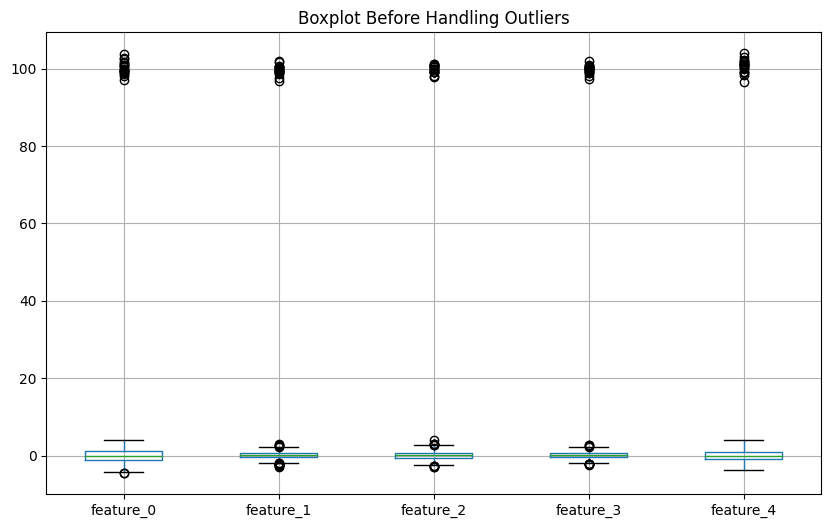

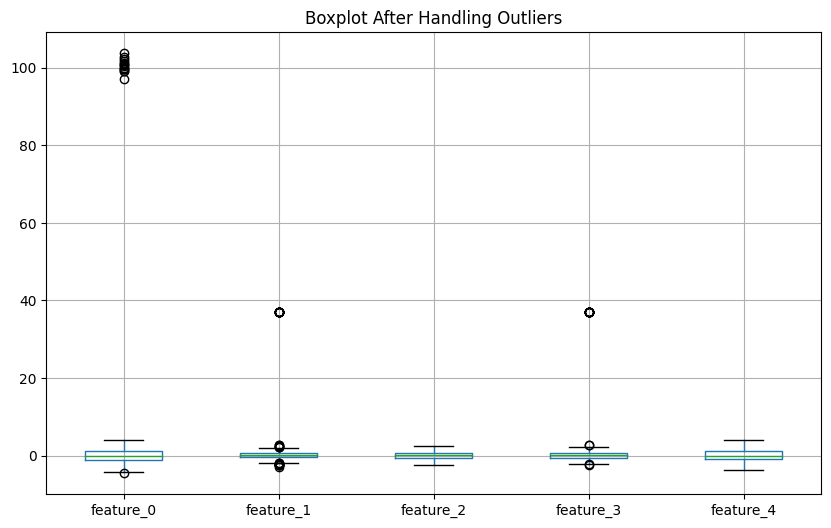

Accuracy after multi-column outlier handling: 0.9033
Evaluating method: RobustScaler
Evaluating method: zscore_capper
Evaluating method: yeo_johnson_capper
Evaluating method: impact_reduction
Evaluating method: adaptive_trimming
Evaluating method: smooth_capping
Evaluating method: local_standardization

Comparison of Accuracy:
Method: RobustScaler, Accuracy: 0.9033
Method: zscore_capper, Accuracy: 0.9033
Method: yeo_johnson_capper, Accuracy: 0.9033
Method: impact_reduction, Accuracy: 0.9033
Method: adaptive_trimming, Accuracy: 0.9033
Method: smooth_capping, Accuracy: 0.9033
Method: local_standardization, Accuracy: 0.9033


In [33]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from OutText_preprocessing.outlier_removal import OutlierRemover
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
df.to_csv("xle.csv")

# Step 2: Add synthetic outliers to simulate real-world noise
df.iloc[::50] += 100

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

# Step 3: Define methods to apply on selected columns for multi-outlier handling
methods_columns_dict = {
    "zscore_capper": ["feature_1", "feature_2"],  # Changed columns
    "local_standardization": ["feature_0"],  # Changed columns
    "impact_reduction": ["feature_3", "feature_4"],  # Changed columns
    "adaptive_trimming": ["feature_2", "feature_4"]  # Changed columns
}

# Step 4: Visualize the distribution of the features before handling outliers using boxplot
plt.figure(figsize=(10, 6))
df[["feature_0", "feature_1", "feature_2", "feature_3", "feature_4"]].boxplot()
plt.title("Boxplot Before Handling Outliers")
plt.show()

# Step 5: Apply multi_outlier_multi_columns to handle outliers for specified columns
remover = OutlierRemover(threshold=2.5)  # Adjust threshold as necessary
X_train_processed = remover.multi_outlier_multi_columns(X_train, methods_columns_dict)
X_test_processed = remover.multi_outlier_multi_columns(X_test, methods_columns_dict)

# Step 6: Visualize the distribution of the features after handling outliers using boxplot
plt.figure(figsize=(10, 6))
X_train_processed[["feature_0", "feature_1", "feature_2", "feature_3", "feature_4"]].boxplot()
plt.title("Boxplot After Handling Outliers")
plt.show()

# Step 7: Train and evaluate RandomForest model after applying multi-column outlier handling
model = RandomForestClassifier(random_state=42)
model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)

# Step 8: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after multi-column outlier handling: {accuracy:.4f}")

# Function to train Random Forest and calculate accuracy (added in case you want to compare with other methods)
def train_and_evaluate(X_train, X_test, y_train, y_test, method, methods_columns_dict=None):
    if method == "RobustScaler":
        # Apply RobustScaler (built-in method)
        scaler = RobustScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    # Handle multi-column outlier removal using methods_columns_dict
    elif methods_columns_dict:
        remover = OutlierRemover(method=method, threshold=2.5)  # Use custom threshold
        try:
            processed_train = remover.multi_outlier_multi_columns(X_train, methods_columns_dict)
            processed_test = remover.multi_outlier_multi_columns(X_test, methods_columns_dict)
        except Exception as e:
            print(f"Error with method {method}: {e}")
            return None

        # Ensure that the number of rows in X_train and y_train are the same
        processed_train = processed_train.iloc[:len(y_train), :]
        processed_test = processed_test.iloc[:len(y_test), :]
    else:
        print("No valid method specified!")
        return None

    # Train Random Forest classifier
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)

    # Predict on test set
    y_pred = rf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Step 9: Define the methods to evaluate with multi-column outlier handling
methods = [
    "RobustScaler",  # Built-in method for scaling (no column-specific handling)
    "zscore_capper",  # Custom outlier handling methods
    "yeo_johnson_capper",
    "impact_reduction",
    "adaptive_trimming",
    "smooth_capping",
    "local_standardization"
]

# Step 10: Compare accuracy for each method (Including multi-column outlier handling)
results = {}
for method in methods:
    print(f"Evaluating method: {method}")
    accuracy = train_and_evaluate(X_train, X_test, y_train, y_test, method, methods_columns_dict)
    if accuracy is not None:
        results[method] = accuracy

# Step 11: Display results
print("\nComparison of Accuracy:")
for method, accuracy in results.items():
    print(f"Method: {method}, Accuracy: {accuracy:.4f}")


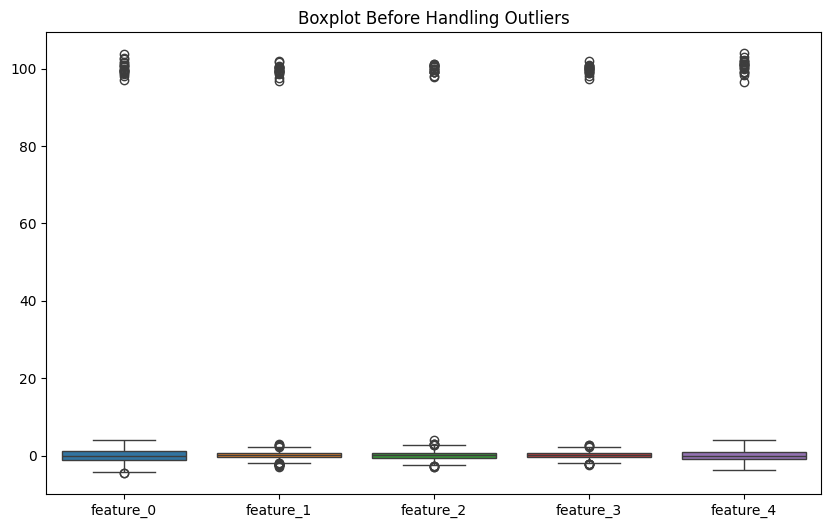

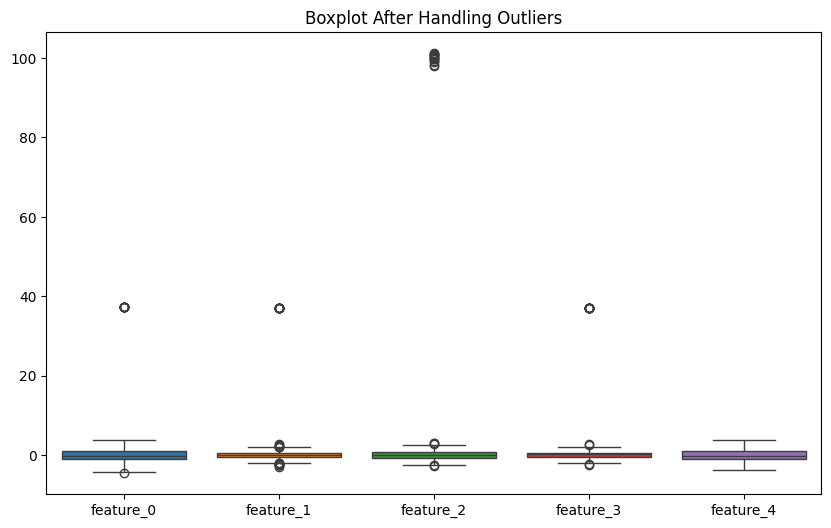

Accuracy after multi-column outlier handling: 0.8900
Evaluating method: RobustScaler


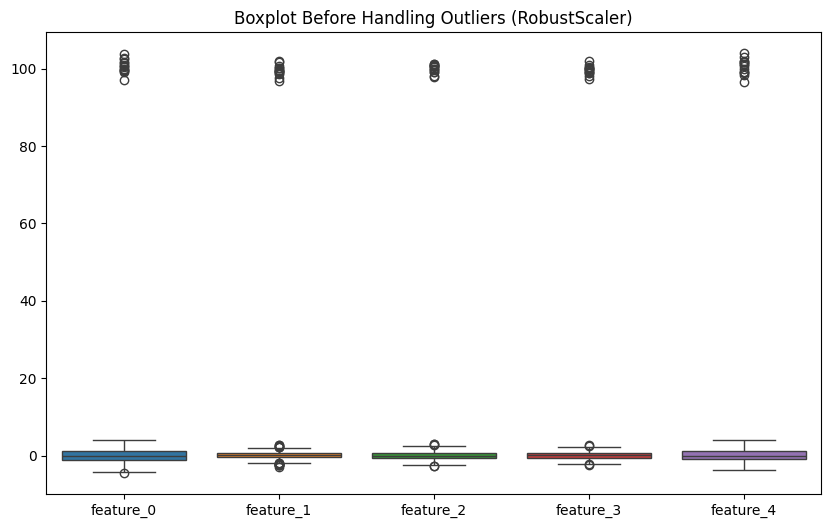

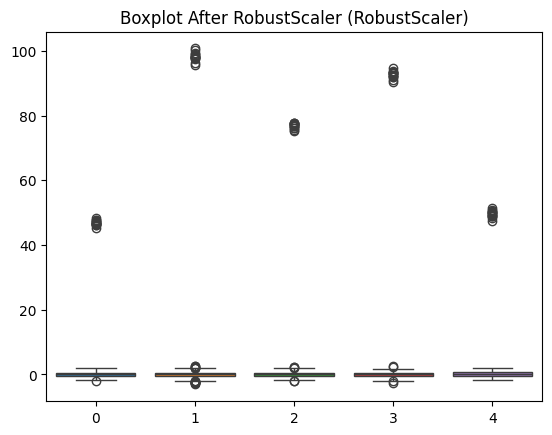

Evaluating method: zscore_capper


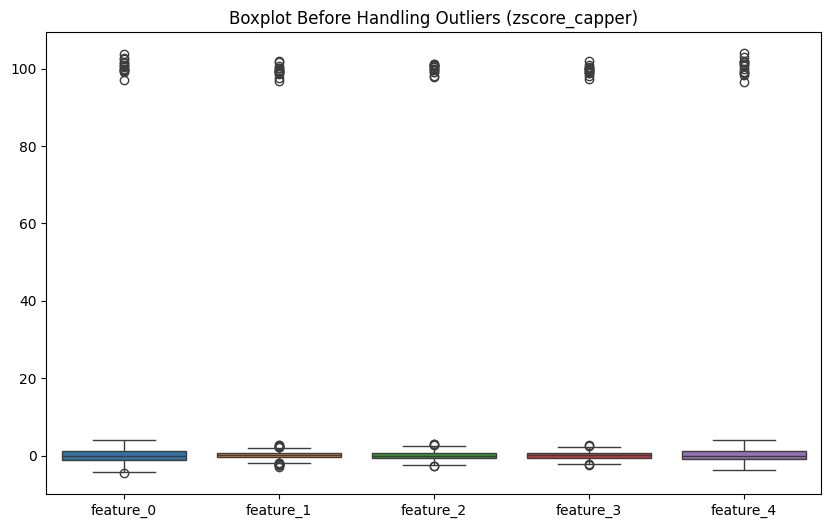

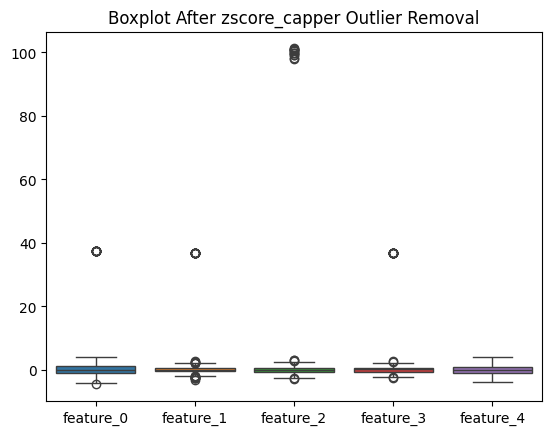

Evaluating method: yeo_johnson_capper


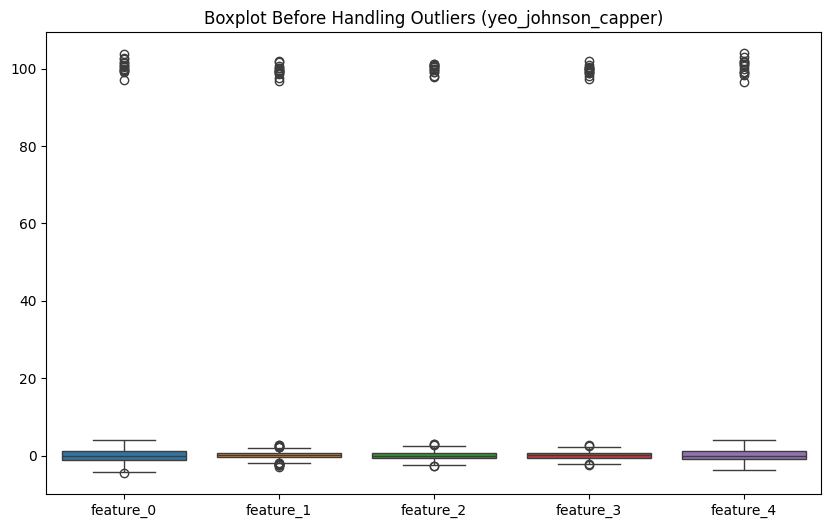

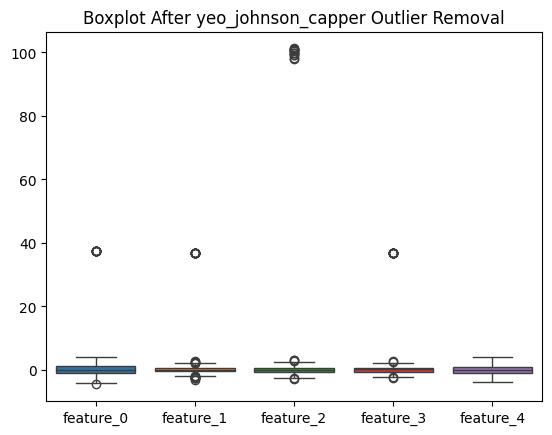

Evaluating method: impact_reduction


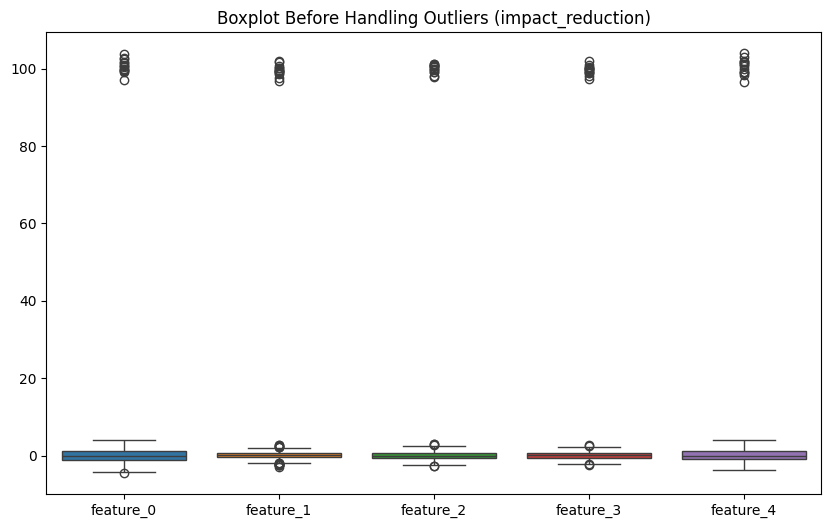

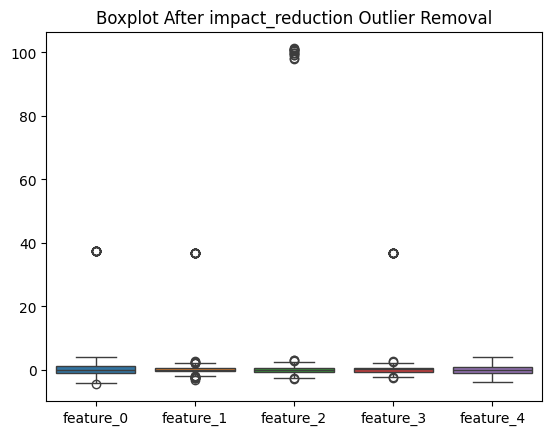

Evaluating method: adaptive_trimming


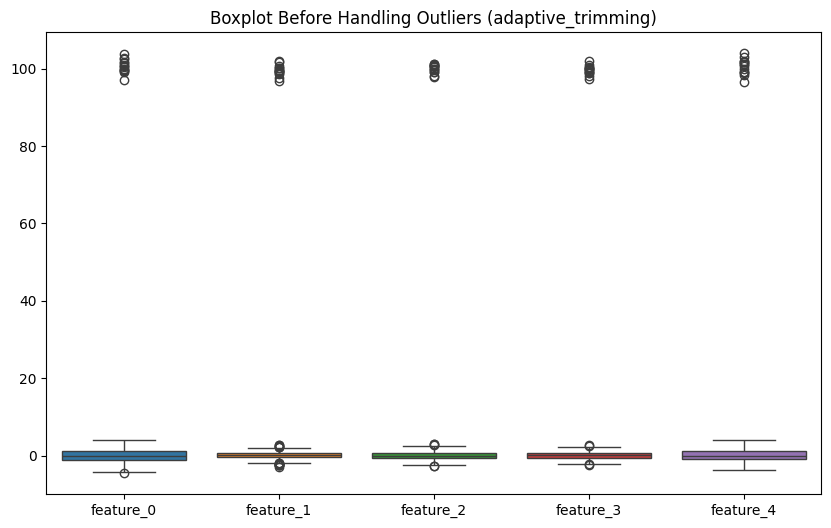

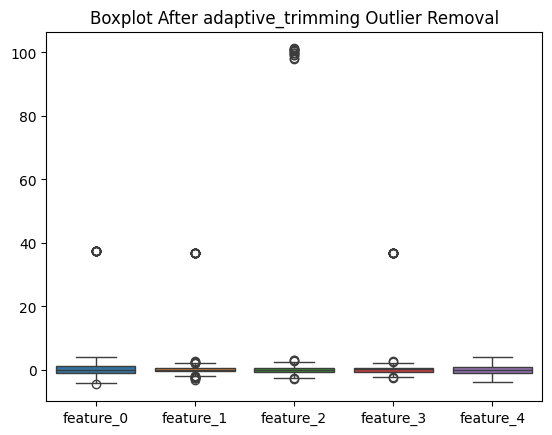

Evaluating method: smooth_capping


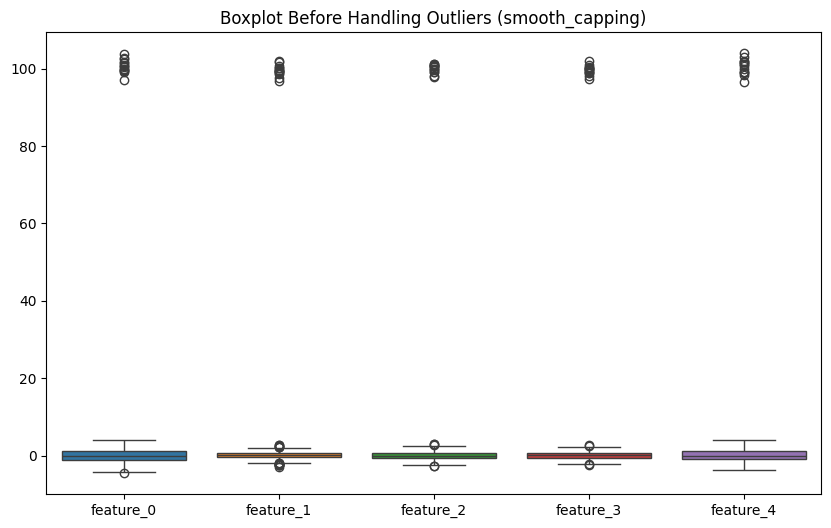

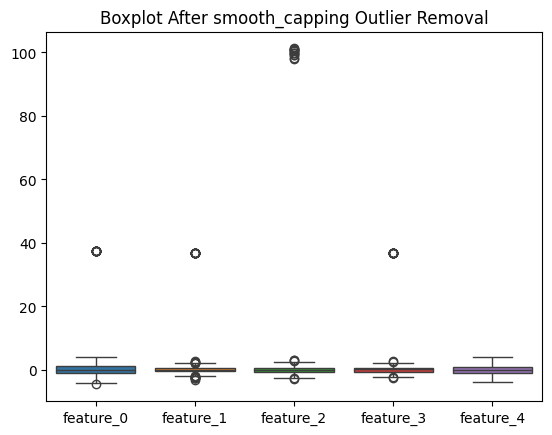

Evaluating method: local_standardization


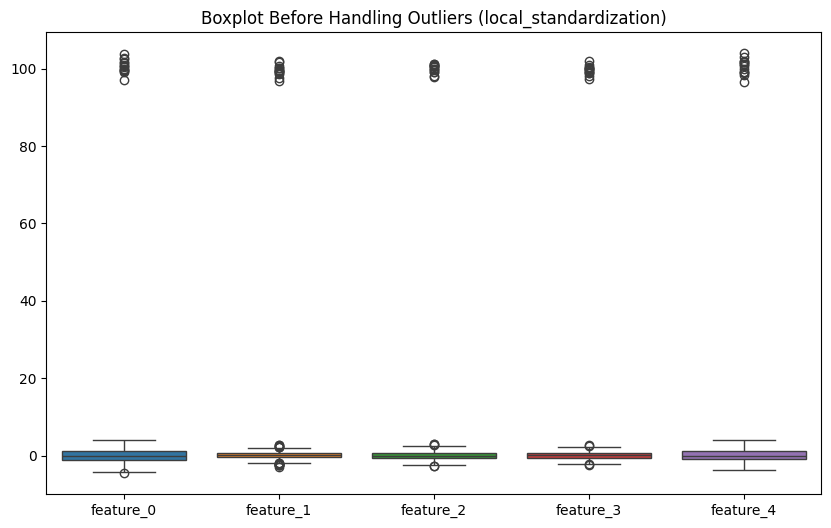

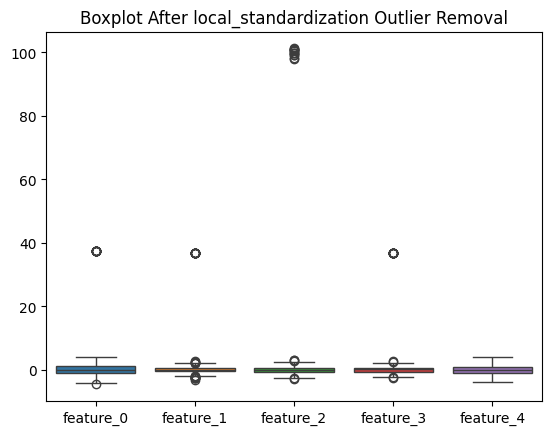


Comparison of Accuracy:
Method: RobustScaler, Accuracy: 0.9033
Method: zscore_capper, Accuracy: 0.9033
Method: yeo_johnson_capper, Accuracy: 0.9033
Method: impact_reduction, Accuracy: 0.9033
Method: adaptive_trimming, Accuracy: 0.9033
Method: smooth_capping, Accuracy: 0.9033
Method: local_standardization, Accuracy: 0.9033


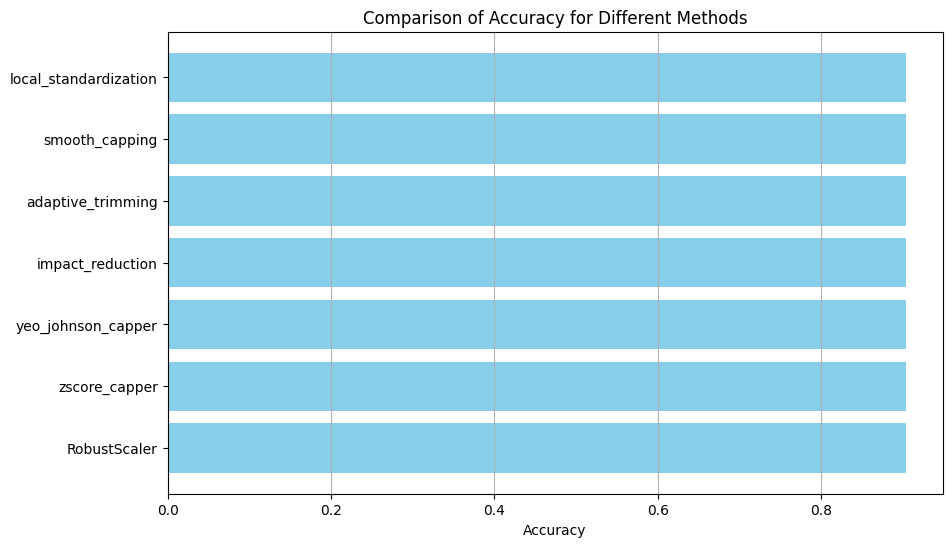

In [34]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from OutText_preprocessing.outlier_removal import OutlierRemover
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
df.to_csv("xle.csv")

# Step 2: Add synthetic outliers (noise) to simulate real-world data
df.iloc[::50] += 100

# Step 3: Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

# Step 4: Define methods to apply multi-column outlier handling
methods_columns_dict = {
    "zscore_capper": ["feature_0", "feature_1"],  # Apply z-score capping to feature_0 and feature_1
    "local_standardization": ["feature_2"],  # Apply local standardization to feature_2
    "impact_reduction": ["feature_3"],  # Apply impact reduction to feature_3
    "adaptive_trimming": ["feature_4"]  # Apply adaptive trimming to feature_4
}

# Step 5: Visualize the distribution of the features before handling outliers using Seaborn boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["feature_0", "feature_1", "feature_2", "feature_3", "feature_4"]])
plt.title("Boxplot Before Handling Outliers")
plt.show()

# Step 6: Apply outlier handling on selected columns using the multi_outlier_multi_columns method
remover = OutlierRemover(threshold=2.5)  # Outlier threshold set to 2.5
X_train_processed = remover.multi_outlier_multi_columns(X_train, methods_columns_dict)
X_test_processed = remover.multi_outlier_multi_columns(X_test, methods_columns_dict)

# Step 7: Visualize the distribution of the features after handling outliers using Seaborn boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train_processed[["feature_0", "feature_1", "feature_2", "feature_3", "feature_4"]])
plt.title("Boxplot After Handling Outliers")
plt.show()

# Step 8: Train RandomForest model after multi-column outlier handling
model = RandomForestClassifier(random_state=42)
model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)

# Step 9: Evaluate accuracy after handling outliers
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after multi-column outlier handling: {accuracy:.4f}")

# Step 10: Function to train RandomForest model and calculate accuracy with different methods
def train_and_evaluate(X_train, X_test, y_train, y_test, method, methods_columns_dict=None):
    if method == "RobustScaler":
        # Use RobustScaler for scaling the features (especially effective when there are outliers)
        scaler = RobustScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    elif methods_columns_dict:
        # Handle multi-column outlier removal using methods_columns_dict (custom outlier handling methods)
        remover = OutlierRemover(method=method, threshold=2.5)
        try:
            processed_train = remover.multi_outlier_multi_columns(X_train, methods_columns_dict)
            processed_test = remover.multi_outlier_multi_columns(X_test, methods_columns_dict)
        except Exception as e:
            print(f"Error with method {method}: {e}")
            return None

        # Ensure the processed data matches the number of rows in the target (y_train and y_test)
        processed_train = processed_train.iloc[:len(y_train), :]
        processed_test = processed_test.iloc[:len(y_test), :]
    else:
        print("No valid method specified!")
        return None

    # Train Random Forest classifier on processed data
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)

    # Predict on test set
    y_pred = rf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Step 11: Define the methods to evaluate with multi-column outlier handling
methods = [
    "RobustScaler",  # Built-in scaling method (use when you want to scale features robustly)
    "zscore_capper",  # Custom outlier handling using z-score capping (use when you want to limit extreme values in specific features)
    "yeo_johnson_capper",  # Yeo-Johnson transformation (use when you want to stabilize variance and make data more normal-like)
    "impact_reduction",  # Impact reduction method (use when you want to reduce the impact of extreme values in features)
    "adaptive_trimming",  # Adaptive trimming (use when you want to remove extreme values based on a dynamic threshold)
    "smooth_capping",  # Smooth capping (use when you want to limit outliers with a smooth threshold method)
    "local_standardization"  # Local standardization (use when you want to standardize features locally within specified groups)
]

# Step 12: Compare accuracy for each method (including multi-column outlier handling)
results = {}
for method in methods:
    print(f"Evaluating method: {method}")
    
    # Apply the outlier removal method and get the processed train and test data
    accuracy = train_and_evaluate(X_train, X_test, y_train, y_test, method, methods_columns_dict)
    
    if accuracy is not None:
        results[method] = accuracy

        # Visualize the before and after using Seaborn
        plt.figure(figsize=(10, 6))
        
        # Before outlier removal
        sns.boxplot(data=X_train[["feature_0", "feature_1", "feature_2", "feature_3", "feature_4"]])
        plt.title(f"Boxplot Before Handling Outliers ({method})")
        plt.show()
        
        # After outlier removal (processed data)
        if method == "RobustScaler":
            # Scaling the data using RobustScaler for before and after comparison
            scaler = RobustScaler()
            X_train_processed = scaler.fit_transform(X_train)
            sns.boxplot(data=X_train_processed)
            plt.title(f"Boxplot After RobustScaler ({method})")
            plt.show()
        else:
            remover = OutlierRemover(method=method, threshold=2.5)
            processed_train = remover.multi_outlier_multi_columns(X_train, methods_columns_dict)
            sns.boxplot(data=processed_train[["feature_0", "feature_1", "feature_2", "feature_3", "feature_4"]])
            plt.title(f"Boxplot After {method} Outlier Removal")
            plt.show()

# Step 13: Display results of accuracy comparison
print("\nComparison of Accuracy:")
for method, accuracy in results.items():
    print(f"Method: {method}, Accuracy: {accuracy:.4f}")

# Step 14: Plot accuracy comparison as a bar chart
methods_list = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
plt.barh(methods_list, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Accuracy for Different Methods')
plt.grid(True, axis='x')
plt.show()


Accuracy after multi-column outlier handling: 0.9033
Evaluating method: RobustScaler
Evaluating method: _smooth_capping
Evaluating method: zscore_capper
Evaluating method: yeo_johnson_capper
Evaluating method: impact_reduction
Evaluating method: adaptive_trimming
Evaluating method: smooth_capping
Evaluating method: local_standardization

Comparison of Accuracy:
Method: RobustScaler, Accuracy: 0.9033
Method: _smooth_capping, Accuracy: 0.6733
Method: zscore_capper, Accuracy: 0.6733
Method: yeo_johnson_capper, Accuracy: 0.6733
Method: impact_reduction, Accuracy: 0.6733
Method: adaptive_trimming, Accuracy: 0.6733
Method: smooth_capping, Accuracy: 0.6733
Method: local_standardization, Accuracy: 0.6733


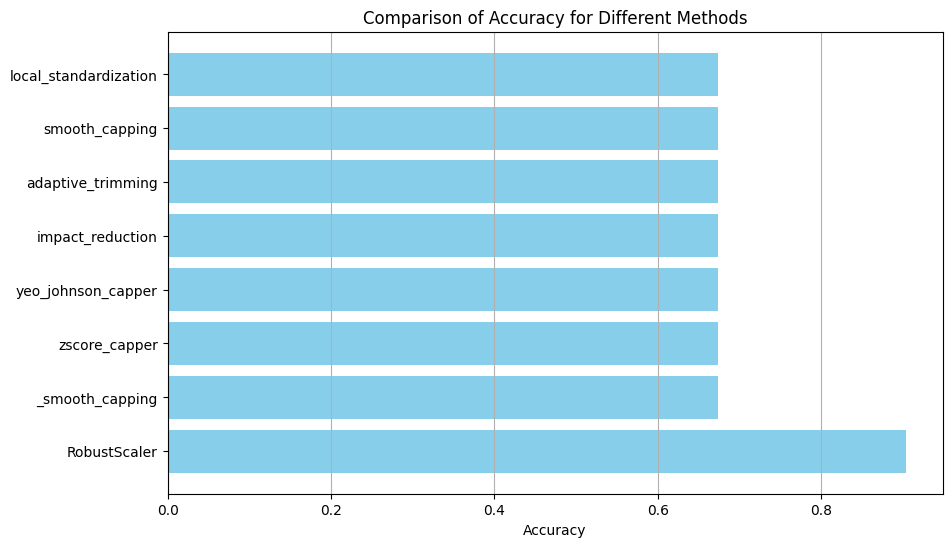

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from OutText_preprocessing.outlier_removal import OutlierRemover

# Step 1: Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])

# Step 2: Add synthetic outliers (noise) to simulate real-world data
df.iloc[::50] += 100

# Step 3: Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

# Step 4: Define methods to apply multi-column outlier handling
methods_columns_dict = {
    "smooth_capping": ["feature_0", "feature_1"],  # Apply z-score capping to feature_0 and feature_1
    "local_standardization": ["feature_2"],  # Apply local standardization to feature_2
    "smooth_capping": ["feature_3"],  # Apply impact reduction to feature_3
    "smooth_capping": ["feature_4"]  # Apply adaptive trimming to feature_4
}

# Step 5: Initialize the OutlierRemover with a threshold
remover = OutlierRemover(threshold=2.5)  # Outlier threshold set to 2.5

# Step 6: Apply outlier handling on selected columns using multi_outlier_multi_columns
X_train_processed = remover.multi_outlier_multi_columns(X_train, methods_columns_dict)
X_test_processed = remover.multi_outlier_multi_columns(X_test, methods_columns_dict)

# Step 7: Train RandomForest model after multi-column outlier handling
model = RandomForestClassifier(random_state=42)
model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)

# Step 8: Evaluate accuracy after handling outliers
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after multi-column outlier handling: {accuracy:.4f}")

# Step 9: Function to train RandomForest model and calculate accuracy with different methods
def train_and_evaluate(X_train, X_test, y_train, y_test, method, methods_columns_dict=None):
    if method == "RobustScaler":
        # Use RobustScaler for scaling the features (especially effective when there are outliers)
        scaler = RobustScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    elif method == "_smooth_capping":
        # Apply smooth capping with threshold 0.8
        capping_threshold = 0.8
        for col in X_train.columns:
            X_train[col] = X_train[col].clip(upper=np.percentile(X_train[col], 100 - capping_threshold*100))
            X_test[col] = X_test[col].clip(upper=np.percentile(X_test[col], 100 - capping_threshold*100))
    elif methods_columns_dict:
        # Handle multi-column outlier removal using methods_columns_dict (custom outlier handling methods)
        remover = OutlierRemover(method=method, threshold=2.5)
        try:
            processed_train = remover.multi_outlier_multi_columns(X_train, methods_columns_dict)
            processed_test = remover.multi_outlier_multi_columns(X_test, methods_columns_dict)
        except Exception as e:
            print(f"Error with method {method}: {e}")
            return None

        # Ensure the processed data matches the number of rows in the target (y_train and y_test)
        processed_train = processed_train.iloc[:len(y_train), :]
        processed_test = processed_test.iloc[:len(y_test), :]
    else:
        print("No valid method specified!")
        return None

    # Train Random Forest classifier on processed data
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)

    # Predict on test set
    y_pred = rf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Step 10: Define the methods to evaluate with multi-column outlier handling
methods = [
    "RobustScaler",  # Built-in scaling method (use when you want to scale features robustly)
    "_smooth_capping",  # Smooth capping method with threshold 0.8
    "zscore_capper",  # Custom outlier handling using z-score capping
    "yeo_johnson_capper",  # Yeo-Johnson transformation
    "impact_reduction",  # Impact reduction method
    "adaptive_trimming",  # Adaptive trimming
    "smooth_capping",  # Smooth capping
    "local_standardization"  # Local standardization
]

# Step 11: Compare accuracy for each method (including multi-column outlier handling)
results = {}
for method in methods:
    print(f"Evaluating method: {method}")
    
    # Apply the outlier removal method and get the processed train and test data
    accuracy = train_and_evaluate(X_train, X_test, y_train, y_test, method, methods_columns_dict)
    
    if accuracy is not None:
        results[method] = accuracy

# Step 12: Display results of accuracy comparison
print("\nComparison of Accuracy:")
for method, accuracy in results.items():
    print(f"Method: {method}, Accuracy: {accuracy:.4f}")

# Step 13: Plot accuracy comparison as a bar chart
methods_list = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
plt.barh(methods_list, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Accuracy for Different Methods')
plt.grid(True, axis='x')
plt.show()


Accuracy after multi-column outlier handling: 0.9067
Evaluating method: RobustScaler
Evaluating method: _smooth_capping
Evaluating method: zscore_capper
Evaluating method: yeo_johnson_capper
Evaluating method: impact_reduction
Evaluating method: adaptive_trimming
Evaluating method: smooth_capping
Evaluating method: local_standardization

Comparison of Accuracy:
Method: RobustScaler, Accuracy: 0.9033
Method: _smooth_capping, Accuracy: 0.6733
Method: zscore_capper, Accuracy: 0.6733
Method: yeo_johnson_capper, Accuracy: 0.6733
Method: impact_reduction, Accuracy: 0.6733
Method: adaptive_trimming, Accuracy: 0.6733
Method: smooth_capping, Accuracy: 0.6733
Method: local_standardization, Accuracy: 0.6733


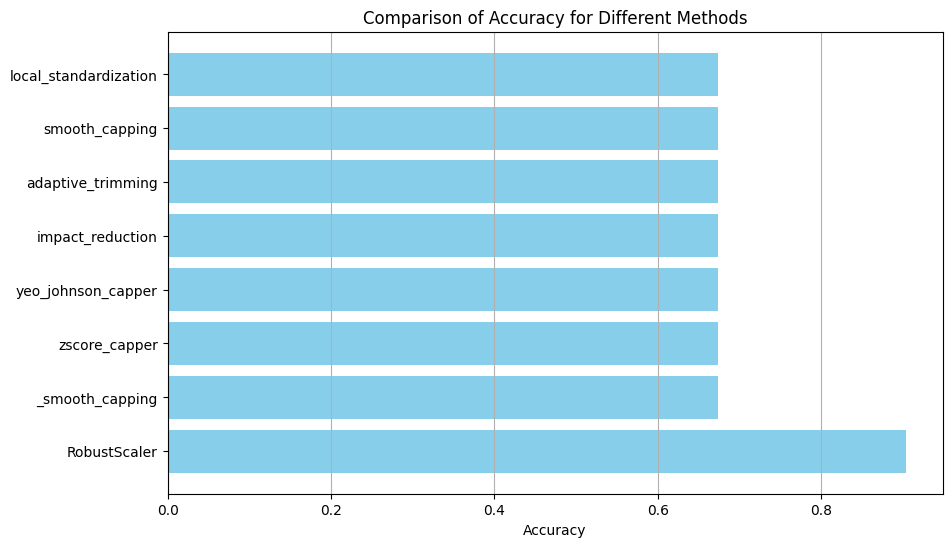

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from OutText_preprocessing.outlier_removal import OutlierRemover

# Step 1: Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])

# Step 2: Add synthetic outliers (noise) to simulate real-world data
df.iloc[::50] += 100

# Step 3: Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

# Step 4: Define methods to apply multi-column outlier handling
methods_columns_dict = {
    "smooth_capping": ["feature_0", "feature_1"],  # Apply z-score capping to feature_0 and feature_1
    "adaptive_trimming": ["feature_2"],  # Apply local standardization to feature_2
    "smooth_capping": ["feature_3"],  # Apply impact reduction to feature_3
    "smooth_capping": ["feature_4"]  # Apply adaptive trimming to feature_4
}

# Step 5: Initialize the OutlierRemover with a threshold
remover = OutlierRemover(threshold=2.5)  # Outlier threshold set to 2.5

# Step 6: Apply outlier handling on selected columns using multi_outlier_multi_columns
X_train_processed = remover.multi_outlier_multi_columns(X_train, methods_columns_dict)
X_test_processed = remover.multi_outlier_multi_columns(X_test, methods_columns_dict)

# Step 7: Train RandomForest model after multi-column outlier handling
model = RandomForestClassifier(random_state=42)
model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)

# Step 8: Evaluate accuracy after handling outliers
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after multi-column outlier handling: {accuracy:.4f}")

# Step 9: Function to train RandomForest model and calculate accuracy with different methods
def train_and_evaluate(X_train, X_test, y_train, y_test, method, methods_columns_dict=None):
    if method == "RobustScaler":
        # Use RobustScaler for scaling the features (especially effective when there are outliers)
        scaler = RobustScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    elif method == "_smooth_capping":
        # Apply smooth capping with threshold 0.8
        capping_threshold = 0.8
        for col in X_train.columns:
            X_train[col] = X_train[col].clip(upper=np.percentile(X_train[col], 100 - capping_threshold*100))
            X_test[col] = X_test[col].clip(upper=np.percentile(X_test[col], 100 - capping_threshold*100))
    elif methods_columns_dict:
        # Handle multi-column outlier removal using methods_columns_dict (custom outlier handling methods)
        remover = OutlierRemover(method=method, threshold=2.5)
        try:
            processed_train = remover.multi_outlier_multi_columns(X_train, methods_columns_dict)
            processed_test = remover.multi_outlier_multi_columns(X_test, methods_columns_dict)
        except Exception as e:
            print(f"Error with method {method}: {e}")
            return None

        # Ensure the processed data matches the number of rows in the target (y_train and y_test)
        processed_train = processed_train.iloc[:len(y_train), :]
        processed_test = processed_test.iloc[:len(y_test), :]
    else:
        print("No valid method specified!")
        return None

    # Train Random Forest classifier on processed data
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)

    # Predict on test set
    y_pred = rf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Step 10: Define the methods to evaluate with multi-column outlier handling
methods = [
    "RobustScaler",  # Built-in scaling method (use when you want to scale features robustly)
    "_smooth_capping",  # Smooth capping method with threshold 0.8
    "zscore_capper",  # Custom outlier handling using z-score capping
    "yeo_johnson_capper",  # Yeo-Johnson transformation
    "impact_reduction",  # Impact reduction method
    "adaptive_trimming",  # Adaptive trimming
    "smooth_capping",  # Smooth capping
    "local_standardization"  # Local standardization
]
print("\n\n\n")
# Step 11: Compare accuracy for each method (including multi-column outlier handling)
results = {}
for method in methods:
    print(f"Evaluating method: {method}")
    
    # Apply the outlier removal method and get the processed train and test data
    accuracy = train_and_evaluate(X_train, X_test, y_train, y_test, method, methods_columns_dict)
    
    if accuracy is not None:
        results[method] = accuracy

# Step 12: Display results of accuracy comparison
print("\nComparison of Accuracy:")
for method, accuracy in results.items():
    print(f"Method: {method}, Accuracy: {accuracy:.4f}")

# Step 13: Plot accuracy comparison as a bar chart
methods_list = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
plt.barh(methods_list, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Accuracy for Different Methods')
plt.grid(True, axis='x')
plt.show()
